In [1]:
# =============================================================================
# Title   : Fuzzy Logic Portfolio — AI & Intelligent Systems (3 Examples)
# Course  : Models and Methods of Intelligent Systems
# Topic   : Fuzzy Inference Systems for Classification, Matching, and Monitoring
# Author  : Dr.-Ing. Cesar Hernando Valencia Niño
# Date    : 2026-01-27
#
# Notebook Contents
# -----------------
# 1) Fuzzy Rule-Based Classifier (feature1, feature2 -> risk)
# 2) Intelligent Matching (skill, experience -> match score)
# 3) Anomaly Scoring (deviation, variability -> anomaly)
# =============================================================================
# =========================
# Install & Imports
# =========================
!pip -q install scikit-fuzzy ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

from ipywidgets import interact, FloatSlider, HTML
from IPython.display import display

try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass

print("Setup complete.")
# =========================
# Helper Utilities
# =========================
def plot_mfs(variable, title_suffix=""):
    plt.figure()
    for term_name, term_obj in variable.terms.items():
        plt.plot(variable.universe, term_obj.mf, label=term_name)
    plt.title(f"Membership Functions — {variable.label} {title_suffix}".strip())
    plt.xlabel(variable.label)
    plt.ylabel("Membership degree")
    plt.ylim(-0.05, 1.05)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def report_system(title, antecedents, consequents, rules):
    print("\n" + "="*80)
    print(title)
    print("="*80)

    def _describe(v):
        u = v.universe
        print(f"\nVariable: {v.label}")
        print(f"  Universe: [{float(u.min()):.4f}, {float(u.max()):.4f}] | Points: {len(u)}")
        print("  Fuzzy sets (terms):")
        for t in v.terms.keys():
            print(f"    - {t}")

    print("\n--- Antecedents (Inputs) ---")
    for a in antecedents: _describe(a)

    print("\n--- Consequents (Outputs) ---")
    for c in consequents: _describe(c)

    print("\n--- Rule Base ---")
    for i, r in enumerate(rules, 1):
        print(f"{i:02d}. {str(r)}")

def build_dashboard(system, inputs_spec, output_name, title):
    sim = ctrl.ControlSystemSimulation(system)

    sliders = {}
    for (name, vmin, vmax, step, v0) in inputs_spec:
        sliders[name] = FloatSlider(value=v0, min=vmin, max=vmax, step=step,
                                    description=name, continuous_update=False)

    display(HTML(f"<h3 style='margin:6px 0'>{title}</h3>"))

    def _run(**kwargs):
        for k, v in kwargs.items():
            sim.input[k] = float(v)
        sim.compute()
        y = float(sim.output[output_name])
        print(f"{output_name} (defuzzified) = {y:.6f}")
        return y

    interact(_run, **sliders)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.0 MB/s eta 0:00:00
Setup complete.



Example 1 — Fuzzy Classifier (feature1, feature2 → risk)

--- Antecedents (Inputs) ---

Variable: feature1
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

Variable: feature2
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Consequents (Outputs) ---

Variable: risk
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Rule Base ---
01. IF feature1[low] AND feature2[low] THEN risk[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF feature1[mid] OR feature2[mid] THEN risk[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF feature1[high] AND feature2[high] THEN risk[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF feature1[high] AND feature2[mid] THEN risk[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
05. IF feature1[mid] AND featur

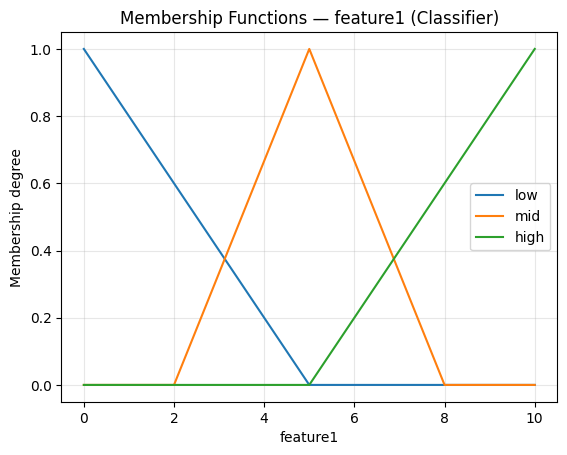

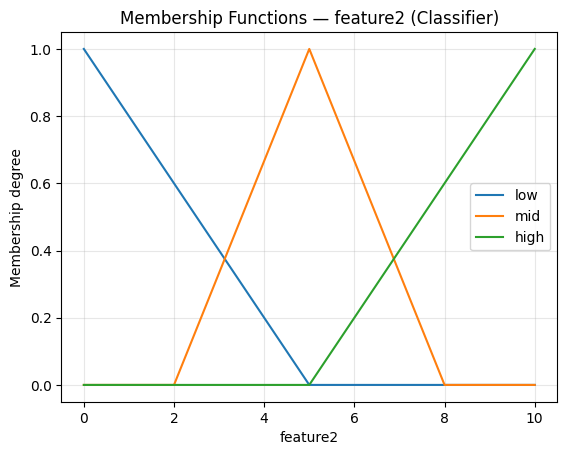

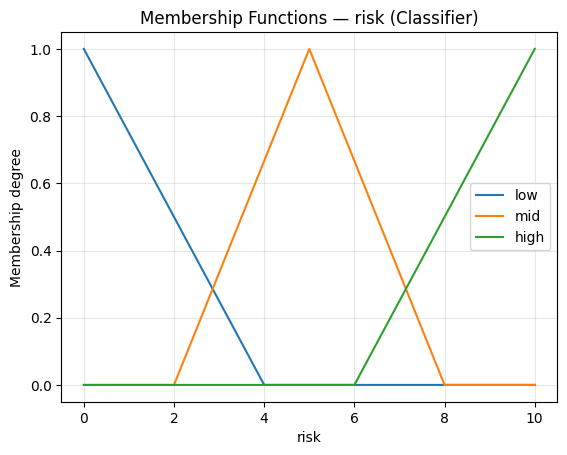

HTML(value="<h3 style='margin:6px 0'>Example 1 — Classifier Dashboard</h3>")

interactive(children=(FloatSlider(value=4.0, continuous_update=False, description='feature1', max=10.0), Float…

In [2]:
# =========================
# Example 1 — Fuzzy Rule-Based Classifier
# =========================
feature1 = ctrl.Antecedent(np.linspace(0, 10, 201), 'feature1')
feature2 = ctrl.Antecedent(np.linspace(0, 10, 201), 'feature2')
risk = ctrl.Consequent(np.linspace(0, 10, 201), 'risk')

feature1['low']  = fuzz.trimf(feature1.universe, [0, 0, 5])
feature1['mid']  = fuzz.trimf(feature1.universe, [2, 5, 8])
feature1['high'] = fuzz.trimf(feature1.universe, [5, 10, 10])

feature2['low']  = fuzz.trimf(feature2.universe, [0, 0, 5])
feature2['mid']  = fuzz.trimf(feature2.universe, [2, 5, 8])
feature2['high'] = fuzz.trimf(feature2.universe, [5, 10, 10])

risk['low']  = fuzz.trimf(risk.universe, [0, 0, 4])
risk['mid']  = fuzz.trimf(risk.universe, [2, 5, 8])
risk['high'] = fuzz.trimf(risk.universe, [6, 10, 10])

rules = [
    ctrl.Rule(feature1['low'] & feature2['low'], risk['low']),
    ctrl.Rule(feature1['mid'] | feature2['mid'], risk['mid']),
    ctrl.Rule(feature1['high'] & feature2['high'], risk['high']),
    ctrl.Rule(feature1['high'] & feature2['mid'], risk['high']),
    ctrl.Rule(feature1['mid'] & feature2['high'], risk['high']),
]

system = ctrl.ControlSystem(rules)

report_system("Example 1 — Fuzzy Classifier (feature1, feature2 → risk)",
              [feature1, feature2], [risk], rules)

plot_mfs(feature1, "(Classifier)")
plot_mfs(feature2, "(Classifier)")
plot_mfs(risk, "(Classifier)")

build_dashboard(system,
                [('feature1', 0, 10, 0.1, 4.0), ('feature2', 0, 10, 0.1, 7.0)],
                'risk',
                "Example 1 — Classifier Dashboard")



Example 2 — Intelligent Matching (skill, experience → match)

--- Antecedents (Inputs) ---

Variable: skill
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

Variable: experience
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Consequents (Outputs) ---

Variable: match
  Universe: [0.0000, 100.0000] | Points: 201
  Fuzzy sets (terms):
    - poor
    - good
    - excellent

--- Rule Base ---
01. IF skill[low] AND experience[low] THEN match[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF skill[mid] AND experience[mid] THEN match[good]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF skill[high] AND experience[high] THEN match[excellent]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF skill[high] AND experience[mid] THEN match[excellent]
	AND aggregation function : fmin
	OR aggregation function  : fmax
05. IF

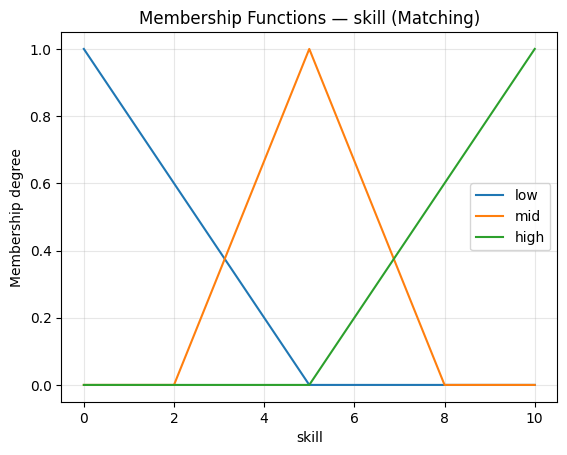

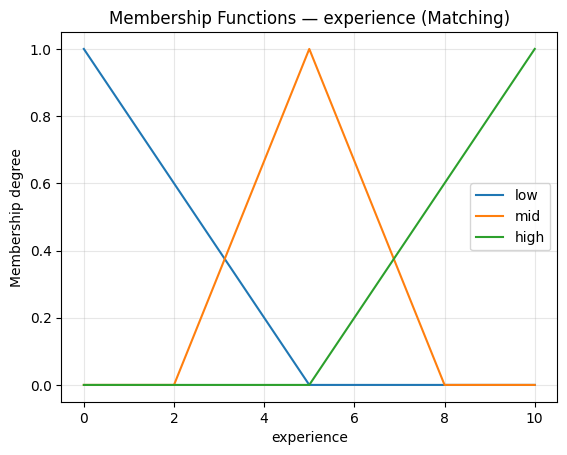

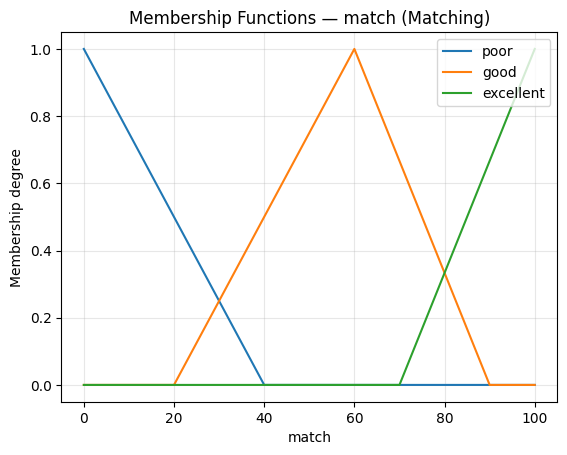

HTML(value="<h3 style='margin:6px 0'>Example 2 — Matching Dashboard</h3>")

interactive(children=(FloatSlider(value=6.0, continuous_update=False, description='skill', max=10.0), FloatSli…

In [3]:
# =========================
# Example 2 — Intelligent Matching
# =========================
skill = ctrl.Antecedent(np.linspace(0, 10, 201), 'skill')
experience = ctrl.Antecedent(np.linspace(0, 10, 201), 'experience')
match = ctrl.Consequent(np.linspace(0, 100, 201), 'match')

skill['low']  = fuzz.trimf(skill.universe, [0, 0, 5])
skill['mid']  = fuzz.trimf(skill.universe, [2, 5, 8])
skill['high'] = fuzz.trimf(skill.universe, [5, 10, 10])

experience['low']  = fuzz.trimf(experience.universe, [0, 0, 5])
experience['mid']  = fuzz.trimf(experience.universe, [2, 5, 8])
experience['high'] = fuzz.trimf(experience.universe, [5, 10, 10])

match['poor']      = fuzz.trimf(match.universe, [0, 0, 40])
match['good']      = fuzz.trimf(match.universe, [20, 60, 90])
match['excellent'] = fuzz.trimf(match.universe, [70, 100, 100])

rules = [
    ctrl.Rule(skill['low'] & experience['low'], match['poor']),
    ctrl.Rule(skill['mid'] & experience['mid'], match['good']),
    ctrl.Rule(skill['high'] & experience['high'], match['excellent']),
    ctrl.Rule(skill['high'] & experience['mid'], match['excellent']),
    ctrl.Rule(skill['mid'] & experience['high'], match['excellent']),
    ctrl.Rule(skill['low'] & experience['high'], match['good']),
]

system = ctrl.ControlSystem(rules)

report_system("Example 2 — Intelligent Matching (skill, experience → match)",
              [skill, experience], [match], rules)

plot_mfs(skill, "(Matching)")
plot_mfs(experience, "(Matching)")
plot_mfs(match, "(Matching)")

build_dashboard(system,
                [('skill', 0, 10, 0.1, 6.0), ('experience', 0, 10, 0.1, 4.0)],
                'match',
                "Example 2 — Matching Dashboard")



Example 3 — Anomaly Scoring (deviation, variability → anomaly)

--- Antecedents (Inputs) ---

Variable: deviation
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

Variable: variability
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

--- Consequents (Outputs) ---

Variable: anomaly
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - normal
    - suspect
    - anomalous

--- Rule Base ---
01. IF deviation[low] AND variability[low] THEN anomaly[normal]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF deviation[low] AND variability[high] THEN anomaly[suspect]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF deviation[high] AND variability[low] THEN anomaly[suspect]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF deviation[high] AND variability[high] THEN anomaly[anomalous]
	AND aggregation function : fmin
	OR aggregation f

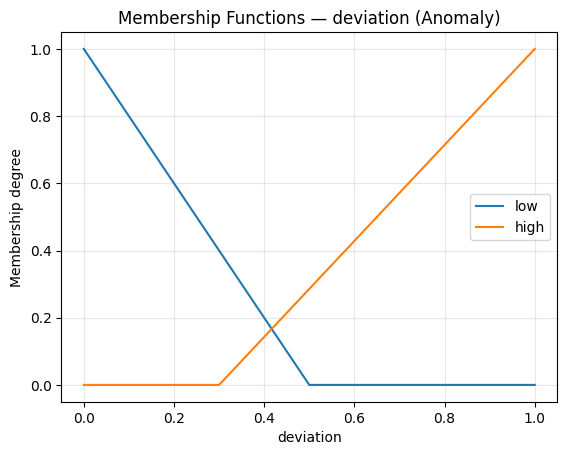

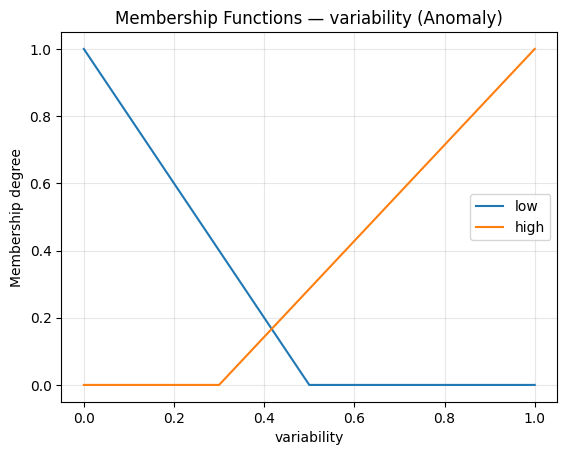

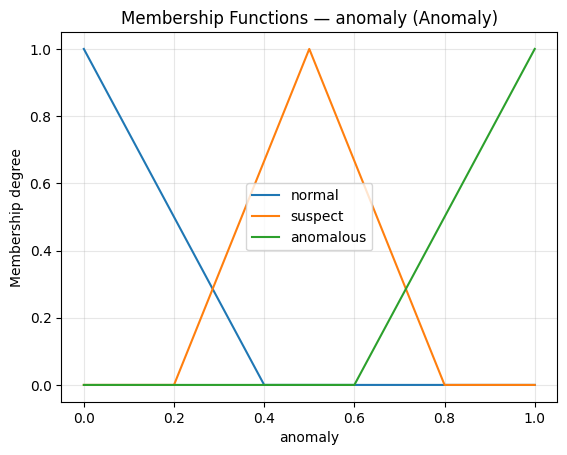

HTML(value="<h3 style='margin:6px 0'>Example 3 — Anomaly Dashboard</h3>")

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='deviation', max=1.0, step=0…

In [4]:
# =========================
# Example 3 — Anomaly Scoring
# =========================
deviation = ctrl.Antecedent(np.linspace(0, 1, 201), 'deviation')
variability = ctrl.Antecedent(np.linspace(0, 1, 201), 'variability')
anomaly = ctrl.Consequent(np.linspace(0, 1, 201), 'anomaly')

deviation['low']  = fuzz.trimf(deviation.universe, [0, 0, 0.5])
deviation['high'] = fuzz.trimf(deviation.universe, [0.3, 1, 1])

variability['low']  = fuzz.trimf(variability.universe, [0, 0, 0.5])
variability['high'] = fuzz.trimf(variability.universe, [0.3, 1, 1])

anomaly['normal']    = fuzz.trimf(anomaly.universe, [0, 0, 0.4])
anomaly['suspect']   = fuzz.trimf(anomaly.universe, [0.2, 0.5, 0.8])
anomaly['anomalous'] = fuzz.trimf(anomaly.universe, [0.6, 1, 1])

rules = [
    ctrl.Rule(deviation['low'] & variability['low'], anomaly['normal']),
    ctrl.Rule(deviation['low'] & variability['high'], anomaly['suspect']),
    ctrl.Rule(deviation['high'] & variability['low'], anomaly['suspect']),
    ctrl.Rule(deviation['high'] & variability['high'], anomaly['anomalous']),
]

system = ctrl.ControlSystem(rules)

report_system("Example 3 — Anomaly Scoring (deviation, variability → anomaly)",
              [deviation, variability], [anomaly], rules)

plot_mfs(deviation, "(Anomaly)")
plot_mfs(variability, "(Anomaly)")
plot_mfs(anomaly, "(Anomaly)")

build_dashboard(system,
                [('deviation', 0, 1, 0.01, 0.2), ('variability', 0, 1, 0.01, 0.6)],
                'anomaly',
                "Example 3 — Anomaly Dashboard")
